In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf
from tensorflow.keras import regularizers

from tensorflow.keras import layers
from tensorflow.keras import losses

from collections import Counter


import pandas as pd
import numpy as np

import sklearn


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


import seaborn as sns

import pydot

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
print(tf.__version__)


2.6.0


In [ ]:
if tf.test.gpu_device_name(): 
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:
    print(" Install GPU version of TF")

Default GPU Device:/device:GPU:0


In [ ]:



def clean_text(text ): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>2))]) 
    
    return text2.lower()



In [ ]:
review_data= pd.read_csv("/content/drive/MyDrive/Soft Computing Project/Dataset.csv")
print(review_data.head(10))
print(len(review_data))
print('Unique Products')
print(len(review_data.groupby('productID')))
print('Unique Users')
print(len(review_data.groupby('reviewerID')))

   Unnamed: 0      reviewerID  ... unixReviewTime   reviewTime
0           0  A30TL5EWN6DFXT  ...     1400630400  05 21, 2014
1           1   ASY55RVNIL0UD  ...     1389657600  01 14, 2014
2           2  A2TMXE2AFO7ONB  ...     1403740800  06 26, 2014
3           3   AWJ0WZQYMYFQ4  ...     1382313600  10 21, 2013
4           4   ATX7CZYFXI1KW  ...     1359849600   02 3, 2013
5           5   APX47D16JOP7H  ...     1381536000  10 12, 2013
6           6  A1JVVYYO7G56DS  ...     1377129600  08 22, 2013
7           7   A6FGO4TBZ3QFZ  ...     1384992000  11 21, 2013
8           8  A2JWEDW5FSVB0F  ...     1380067200  09 25, 2013
9           9   A8AJS1DW7L3JJ  ...     1396483200   04 3, 2014

[10 rows x 9 columns]
194226
Unique Products
10429
Unique Users
27879


In [ ]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [ ]:

STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
    

In [ ]:
 import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
review_data.dropna(axis = 0, how ='any',inplace=True) 


def remove_url(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)




review_data['reviewText'] = review_data['reviewText'].apply(remove_stopwords)
review_data['reviewText'] = review_data['reviewText'].apply(remove_url)
review_data['reviewText'] = review_data['reviewText'].apply(remove_html)
review_data['reviewText'] = review_data['reviewText'].apply(lemmatize_words)
review_data['reviewText'] = review_data['reviewText'].apply(clean_text)
review_data['Num_words_text'] = review_data['reviewText'].apply(lambda x:len(str(x).split())) 

print('-------Dataset --------')
print(review_data['rating'].value_counts())
print(len(review_data))
print('-------------------------')
max_review_data_sentence_length  = review_data['Num_words_text'].max()

print('Train Max Sentence Length :'+str(max_review_data_sentence_length))





-------Dataset --------
5.0    108496
4.0     39963
3.0     21434
1.0     13268
2.0     11059
Name: rating, dtype: int64
194220
-------------------------
Train Max Sentence Length :3020


In [ ]:
review_data.head()

,Unnamed: 0,reviewerID,productID,helpful,reviewText,rating,summary,unixReviewTime,reviewTime,Num_words_text
0,0,A30TL5EWN6DFXT,120401325X,"[0, 0]",they look good stick good like rounded shape a...,4.0,Looks Good,1400630400,"05 21, 2014",17
1,1,ASY55RVNIL0UD,120401325X,"[0, 0]",these sticker work like review say they stick ...,5.0,Really great product.,1389657600,"01 14, 2014",16
2,2,A2TMXE2AFO7ONB,120401325X,"[0, 0]",these awesome make phone look stylish used one...,5.0,LOVE LOVE LOVE,1403740800,"06 26, 2014",19
3,3,AWJ0WZQYMYFQ4,120401325X,"[4, 4]",item arrived great time perfect condition howe...,4.0,Cute!,1382313600,"10 21, 2013",28
4,4,ATX7CZYFXI1KW,120401325X,"[2, 3]",awesome stay look great used multiple apple pr...,5.0,leopard home button sticker for iphone 4s,1359849600,"02 3, 2013",13


In [ ]:
review_data['Num_words_text'].describe()

count    194220.000000
mean         46.896432
std          70.111864
min           0.000000
25%          14.000000
50%          24.000000
75%          51.000000
max        3020.000000
Name: Num_words_text, dtype: float64

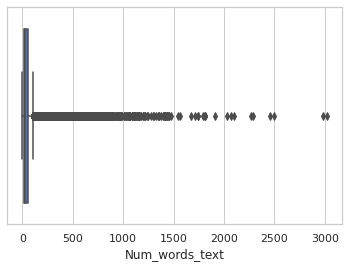

In [ ]:
sns.set(style="whitegrid")
sns.boxplot(x=review_data['Num_words_text'])

In [ ]:
mask = (review_data['Num_words_text'] < 100) & (review_data['Num_words_text'] >=20)
df_short_reviews = review_data[mask]
print('No of Short reviews')
print(len(df_short_reviews))

mask = review_data['Num_words_text'] >= 100
df_long_reviews = review_data[mask]
print('No of Long reviews')
print(len(df_long_reviews))

No of Short reviews
94192
No of Long reviews
21067


In [ ]:
print(df_short_reviews['Num_words_text'].max())

99


In [ ]:
def get_sentiment(rating):
    if rating == 5 or rating == 4 or rating ==3:
        return 1
    else:
        return 0
    

In [ ]:

filtered_data = df_short_reviews.groupby('productID').filter(lambda x: len(x) >= 20)
print(len(filtered_data))
print(filtered_data ['rating'].value_counts())
filtered_data ['sentiment'] = filtered_data ['rating'].apply(get_sentiment)

train_data = filtered_data[['reviewText','sentiment']]
print('Train data')
print(train_data['sentiment'].value_counts())

#Test Data
mask = review_data['Num_words_text'] < 100 
df_short_reviews = review_data[mask]
filtered_data = df_short_reviews.groupby('productID').filter(lambda x: len(x) >= 10)
print(len(filtered_data))
print(filtered_data ['rating'].value_counts())
filtered_data ['sentiment'] = filtered_data ['rating'].apply(get_sentiment)

test_data = filtered_data[['reviewText','sentiment']]
print('Test data')
print(test_data['sentiment'].value_counts())




43277
5.0    24305
4.0     9382
3.0     4595
1.0     2587
2.0     2408
Name: rating, dtype: int64
Train data
1    38282
0     4995
Name: sentiment, dtype: int64
137912
5.0    78939
4.0    27034
3.0    14920
1.0     9454
2.0     7565
Name: rating, dtype: int64
Test data
1    120893
0     17019
Name: sentiment, dtype: int64


In [ ]:
train_data['sentiment'].value_counts()

1    38282
0     4995
Name: sentiment, dtype: int64

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(train_data['reviewText'].tolist(),\
                                                      train_data['sentiment'].tolist(),\
                                                      test_size=0.5,\
                                                      stratify = train_data['sentiment'].tolist(),\
                                                      random_state=0)


print('Train data len:'+str(len(X_train)))
print('Class distribution'+str(Counter(y_train)))
print('Valid data len:'+str(len(X_valid)))
print('Class distribution'+ str(Counter(y_valid)))

Train data len:21638
Class distributionCounter({1: 19141, 0: 2497})
Valid data len:21639
Class distributionCounter({1: 19141, 0: 2498})


In [ ]:
num_words = 50000

tokenizer = Tokenizer(num_words=num_words,oov_token="unk")
tokenizer.fit_on_texts(X_train)


print(str(tokenizer.texts_to_sequences(['This is good.'])))

   


[[7, 1, 16]]


In [ ]:



x_train = np.array( tokenizer.texts_to_sequences(X_train) )
x_valid = np.array( tokenizer.texts_to_sequences(X_valid) )
x_test  = np.array( tokenizer.texts_to_sequences(test_data['reviewText'].tolist()) )



x_train = pad_sequences(x_train, padding='post', maxlen=100)
x_valid = pad_sequences(x_valid, padding='post', maxlen=100)
x_test = pad_sequences(x_test, padding='post', maxlen=100)



train_labels = np.asarray(y_train )
valid_labels = np.asarray( y_valid)

test_labels = np.asarray(test_data['sentiment'].tolist())

print('Train data len:'+str(len(x_train)))
print('Class distribution'+str(Counter(train_labels)))

print('Validation data len:'+str(len(x_valid)))
print('Class distribution'+str(Counter(valid_labels)))

print('Test data len:'+str(len(x_test)))
print('Class distribution'+str(Counter(test_labels)))


train_ds = tf.data.Dataset.from_tensor_slices((x_train,train_labels))
valid_ds = tf.data.Dataset.from_tensor_slices((x_valid,valid_labels))
test_ds = tf.data.Dataset.from_tensor_slices((x_test,test_labels))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=o

Train data len:21638
Class distributionCounter({1: 19141, 0: 2497})
Validation data len:21639
Class distributionCounter({1: 19141, 0: 2498})
Test data len:137912
Class distributionCounter({1: 120893, 0: 17019})


In [ ]:
count =0
print('======Train dataset ====')
for value,label in train_ds:
    count += 1
    print(value,label)
    if count==1:
        break
count =0
print('======Validation dataset ====')
for value,label in valid_ds:
    count += 1
    print(value,label)
    if count==1:
        break
count =0
print('======Test dataset ====')
for value,label in test_ds:
    count += 1
    print(value,label)
    if count==1:
        break  

======Train dataset ====
tf.Tensor(
[ 111  515    3 1055 3439    6   40   55    3  301  188  458   13   17
    4   52  486   29   81 3350  155   54   58   57   28   75   35  323
  152  478   57  429  129    8    3    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0], shape=(100,), dtype=int32) tf.Tensor(1, shape=(), dtype=int64)
======Validation dataset ====
tf.Tensor(
[  159 11108  3293  1451    26   744   144   779 11956  1394  3239  4335
    81    26   261   143   105  1551   526    43    28  2211   193  1215
   224   101   143   495  4421   539     2   597   105   354   343    17
 14910   571   712   571   261  1207   299  3171  1129   942   164  3441
  1944   199  2495   436   124   942   164    81   159    

In [ ]:
max_features =50000
embedding_dim =16
sequence_length = 100

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(max_features +1, embedding_dim, input_length=sequence_length,\
                                    embeddings_regularizer = regularizers.l2(0.005))) 
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.LSTM(embedding_dim,dropout=0.2, recurrent_dropout=0.2,return_sequences=True,\
                                                             kernel_regularizer=regularizers.l2(0.005),\
                                                             bias_regularizer=regularizers.l2(0.005)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(512, activation='relu',\
                                kernel_regularizer=regularizers.l2(0.001),\
                                bias_regularizer=regularizers.l2(0.001),))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Dense(8, activation='relu',\
                                kernel_regularizer=regularizers.l2(0.001),\
                                bias_regularizer=regularizers.l2(0.001),))
model.add(tf.keras.layers.Dropout(0.4))


model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
                               



model.summary()
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(1e-3),metrics=[tf.keras.metrics.BinaryAccuracy()])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           800016    
_________________________________________________________________
dropout (Dropout)            (None, 100, 16)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 100, 16)           2112      
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               819712    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 4

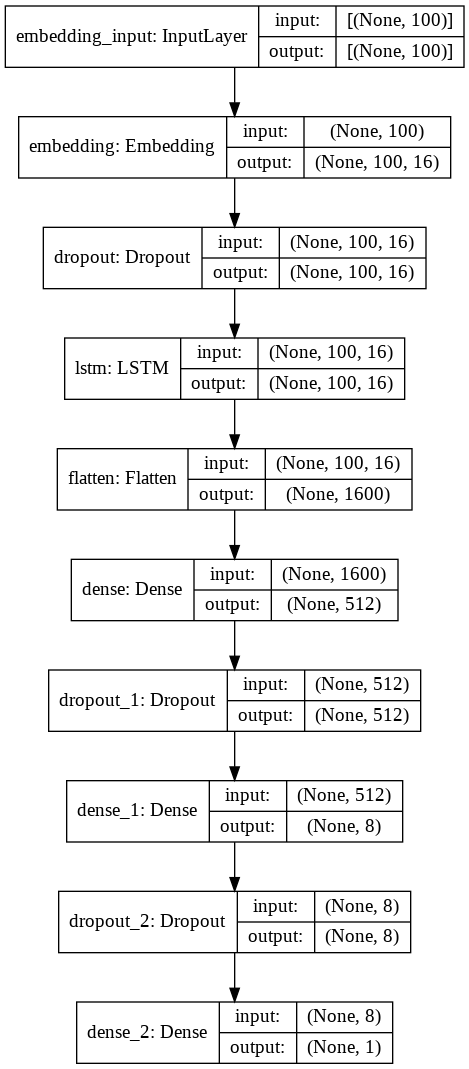

In [ ]:
tf.keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

In [ ]:
epochs = 10

history = model.fit(train_ds.shuffle(5000).batch(1024),
                    epochs= epochs ,
                    validation_data=valid_ds.batch(1024),
                    verbose=1)

Epoch 1/10
22/22 [==============================] - 23s 772ms/step - loss: 3.0278 - binary_accuracy: 0.8824 - val_loss: 1.5125 - val_binary_accuracy: 0.8846
Epoch 2/10
22/22 [==============================] - 16s 740ms/step - loss: 1.0540 - binary_accuracy: 0.8846 - val_loss: 0.6824 - val_binary_accuracy: 0.8846
Epoch 3/10
22/22 [==============================] - 16s 737ms/step - loss: 0.6233 - binary_accuracy: 0.8846 - val_loss: 0.5267 - val_binary_accuracy: 0.8846
Epoch 4/10
22/22 [==============================] - 16s 748ms/step - loss: 0.5193 - binary_accuracy: 0.8846 - val_loss: 0.4582 - val_binary_accuracy: 0.8846
Epoch 5/10
22/22 [==============================] - 16s 747ms/step - loss: 0.4595 - binary_accuracy: 0.8846 - val_loss: 0.4218 - val_binary_accuracy: 0.8846
Epoch 6/10
22/22 [==============================] - 17s 754ms/step - loss: 0.4188 - binary_accuracy: 0.8846 - val_loss: 0.4008 - val_binary_accuracy: 0.8846
Epoch 7/10
22/22 [==============================] - 16s 74

In [ ]:
history.history


{'binary_accuracy': [0.882382869720459,
  0.8846011757850647,
  0.8846011757850647,
  0.8846011757850647,
  0.8846011757850647,
  0.8846011757850647,
  0.8846011757850647,
  0.8846011757850647,
  0.8846011757850647,
  0.8846011757850647],
 'loss': [3.0278193950653076,
  1.0540128946304321,
  0.6233432292938232,
  0.5193190574645996,
  0.45950496196746826,
  0.4187566041946411,
  0.3947068452835083,
  0.3781938850879669,
  0.36295297741889954,
  0.3713603615760803],
 'val_binary_accuracy': [0.8845602869987488,
  0.8845602869987488,
  0.8845602869987488,
  0.8845602869987488,
  0.8845602869987488,
  0.8845602869987488,
  0.8845602869987488,
  0.8845602869987488,
  0.8845602869987488,
  0.8845602869987488],
 'val_loss': [1.512460470199585,
  0.6823931336402893,
  0.526683509349823,
  0.45824116468429565,
  0.42181453108787537,
  0.40079715847969055,
  0.41666942834854126,
  0.38982218503952026,
  0.45259007811546326,
  0.39606720209121704]}

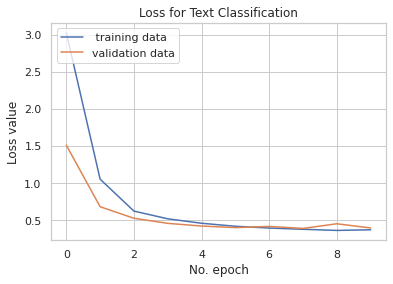

In [ ]:

plt.plot(history.history['loss'], label=' training data')
plt.plot(history.history['val_loss'], label='validation data')
plt.title('Loss for Text Classification')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

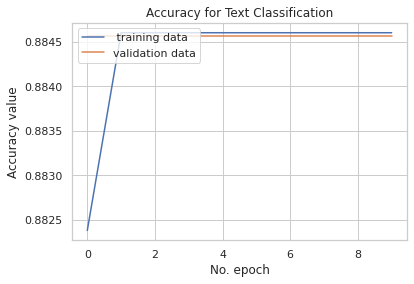

In [ ]:


plt.plot(history.history['binary_accuracy'], label=' training data')
plt.plot(history.history['val_binary_accuracy'], label='validation data')
plt.title('Accuracy for Text Classification')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()


In [ ]:
model.save('C:\\AmazonReviewsCellPhones\\savedTFLSTMModel\\tf_lstmmodel.h5') 
json_string = tokenizer.to_json()


In [ ]:
import json
with open('C:\\AmazonReviewsCellPhones\\savedTFLSTMModel\\tokenizer.json', 'w') as outfile:
    json.dump(json_string, outfile)
    

In [ ]:
valid_predict= model.predict(x_valid)

In [ ]:
print(valid_predict[:10])

[[0.99986374]
 [0.9221328 ]
 [0.5186273 ]
 [0.99972767]
 [0.9974267 ]
 [0.99792296]
 [0.9928698 ]
 [0.99415284]
 [0.99465346]
 [0.9955195 ]]


In [ ]:
def plot_roc(name, labels, predictions, **kwargs):
    fp, tp, thresholds = sklearn.metrics.roc_curve(labels, predictions)
    plt.plot(fp, tp, label=name, linewidth=2, **kwargs)
    plt.xlabel('False positives Rate')
    plt.ylabel('True positives Rate')
    plt.xlim([-0.03, 1.0])
    plt.ylim([0.0, 1.03])
    plt.grid(True)
    thresholdsLength = len(thresholds)
    thresholds_every = 1000
    colorMap = plt.get_cmap('jet', thresholdsLength)
    for i in range(0, thresholdsLength, thresholds_every):
        threshold_value_with_max_four_decimals = str(thresholds[i])[:5]
        plt.text(fp[i] - 0.03, tp[i] + 0.001, threshold_value_with_max_four_decimals, fontdict={'size': 15}, color=colorMap(i/thresholdsLength));

    ax = plt.gca()
    ax.set_aspect('equal')

In [ ]:


colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

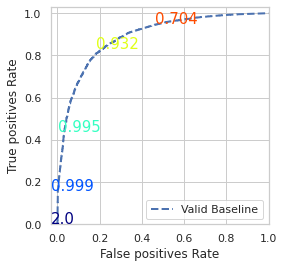

In [ ]:
plot_roc("Valid Baseline", valid_labels, valid_predict, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

In [ ]:
new_model = tf.keras.models.load_model('C:\\AmazonReviewsCellPhones\\savedTFLSTMModel\\tf_lstmmodel.h5')
new_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           800016    
_________________________________________________________________
dropout (Dropout)            (None, 100, 16)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 100, 16)           2112      
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               819712    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 4

In [ ]:
with open('C:\\AmazonReviewsCellPhones\\savedTFLSTMModel\\tokenizer.json') as json_file:
    json_string = json.load(json_file)
tokenizer1 = tf.keras.preprocessing.text.tokenizer_from_json(json_string)

In [ ]:
x_test  = np.array( tokenizer.texts_to_sequences(test_data['reviewText'].tolist()) )
x_test = pad_sequences(x_test, padding='post', maxlen=100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [ ]:

print("Generate predictions for all samples")
predictions = new_model.predict(x_test)



Generate predictions for all samples


In [ ]:
test_data['pred_sentiment']= predictions
test_data['pred_sentiment'] = np.where((test_data.pred_sentiment >= 0.78),1,test_data.pred_sentiment)
test_data['pred_sentiment'] = np.where((test_data.pred_sentiment < 0.78),0,test_data.pred_sentiment)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics   
from sklearn.metrics import f1_score
lebels=test_data['sentiment'].tolist()
pred_lebels=test_data['pred_sentiment'].tolist()

accuracy = accuracy_score(lebels, pred_lebels)
print('Accuracy: %f' % accuracy)

precision = precision_score(lebels, pred_lebels)
print('Precision: %f' % precision)

recall = recall_score(lebels, pred_lebels)
print('Recall: %f' % recall)

f1 = f1_score(lebels, pred_lebels)
print('F1 score: %f' % f1)

Accuracy: 0.900081
Precision: 0.934391
Recall: 0.952925
F1 score: 0.943567


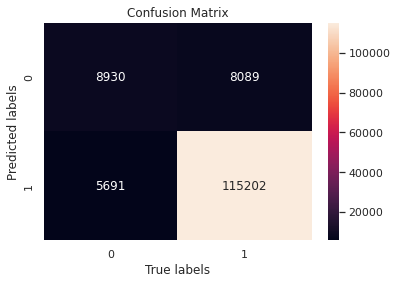

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import metrics   
from sklearn.metrics import confusion_matrix 

ax= plt.subplot()

cm = confusion_matrix(lebels, pred_lebels)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  


ax.set_xlabel('True labels');ax.set_ylabel('Predicted labels'); 
ax.set_title('Confusion Matrix');

In [ ]:
labels = [0, 1]
    
print(classification_report(test_data['sentiment'].tolist(),test_data['pred_sentiment'].tolist(),labels=labels))

              precision    recall  f1-score   support

           0       0.61      0.52      0.56     17019
           1       0.93      0.95      0.94    120893

    accuracy                           0.90    137912
   macro avg       0.77      0.74      0.75    137912
weighted avg       0.89      0.90      0.90    137912

